In [30]:
import re
import numpy as np

In [31]:
file=open('C:\\Users\\zhou\\Desktop\\word.csv',encoding='utf-8')
list_line=[]
for line in file.readlines():
    line.strip()
    list_line.append(line)

In [32]:
list_word=[]
for num in range(len(list_line)):
    for i in re.split('\.| |\,|\!|\?|\"|\;',list_line[num].strip()):
        if i=='':
            pass
        else:
            list_word.append(i)

In [33]:
list_set_word=list(set(list_word))

In [34]:
#one_hot编码
dict_word={}
count=-1
for word in list_set_word:
    count+=1
    vector=np.zeros((len(list_set_word),1))
    vector[count]=1
    dict_word[word]=vector

In [35]:
dict_new_vector_word={}
coun=-1
for word in list_set_word:
    coun+=1
    vector1=np.zeros((len(list_set_word),1))
    dict_new_vector_word[word]=vector1
    

In [36]:
list_sentence1=[]
for i in range(len(list_line)):
    list_sentence1.append(list_line[i].strip())
list_sentence=[]
for nums  in range(len(list_sentence1)):
    for i in re.split('\.|\?|\!',list_sentence1[nums]):
        if i=='':
            pass
        else:
            list_sentence.append(i)
    

In [37]:
#利用中心词的前2个和后2个

In [39]:
list_all_sen_word=[]
for i in range(len(list_sentence)):
    list_all_sen_word.append([])
    for j in re.split('\.| |\,|\!|\?|\"|\;',list_sentence[i].strip()):
        if j=='':
            pass
        else:
            list_all_sen_word[i].append(j)


In [40]:
list_vector=[]
for sen_word in list_all_sen_word:
    if len(sen_word)==0:
        pass
    else:
        if len(sen_word)==1:
            list_vector.append(dict_word['%s'%(sen_word[0])])
        else:
            if len(sen_word)==2:
                list_vector.append(dict_word['%s'%(sen_word[1])])
                list_vector.append(dict_word['%s'%(sen_word[0])])
            else:
                if len(sen_word)==3:
                    list_vector.append(dict_word['%s'%(sen_word[1])]+dict_word['%s'%(sen_word[2])])
                    list_vector.append(dict_word['%s'%(sen_word[0])]+dict_word['%s'%(sen_word[2])])
                    list_vector.append(dict_word['%s'%(sen_word[0])]+dict_word['%s'%(sen_word[1])])
                else:
                    for word in sen_word:
                        if sen_word.index(word)==0:
                            list_vector.append(dict_word['%s'%(sen_word[1])]+dict_word['%s'%(sen_word[2])])
                        else:
                            if sen_word.index(word)==1:
                                list_vector.append(dict_word['%s'%(sen_word[0])]+dict_word['%s'%(sen_word[2])]+dict_word['%s'%(sen_word[3])])
                            else:
                                if sen_word.index(word)==len(sen_word)-1:
                                    list_vector.append(dict_word['%s'%(sen_word[-2])]+dict_word['%s'%(sen_word[-3])])
                                else:
                                    if sen_word.index(word)==len(sen_word)-2:
                                        list_vector.append(dict_word['%s'%(sen_word[-1])]+dict_word['%s'%(sen_word[-3])]+dict_word['%s'%(sen_word[-4])])
                                    else:
                                        num=sen_word.index(word)
                                        list_vector.append(dict_word['%s'%(sen_word[num-1])]+dict_word['%s'%(sen_word[num-2])]+dict_word['%s'%(sen_word[num+1])]+dict_word['%s'%(sen_word[num+2])])

            
    
    

In [41]:
list_out=[]
for word in list_word:
    list_out.append(dict_word['%s'%(word)])

In [42]:
len(list_out[1])

772

In [43]:
len(list_word)

2138

In [44]:
import random

In [45]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [46]:
def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))

In [47]:
def softmax(z):
    shiftz=z-np.max(z)
    return np.exp(shiftz)/sum(np.exp(shiftz))

In [48]:
def softmax_derivative(z):
    shiftz=z-np.max(z)
    return (shiftz*np.exp(shiftz)*(sum(np.exp(shiftz))-np.exp(shiftz)))/sum(np.exp(shiftz))**2

In [107]:
def network(w1,w2,x,y):
    learnrate=0.015
    for i in range(3):
        #正向传播
        z1=w1.dot(x)
        z2=w2.dot(z1)
        a2=softmax(z2)
        #反向传播
        dy_dw2=(z1.T)*(a2-y)
        dy_dw1=x.T*(w2.T.dot(a2-y))
        #更新
        w1=w1-learnrate*dy_dw1
        w2=w2-learnrate*dy_dw2
    return a2,w1,w2
        
    

In [108]:
len(list_vector[0])

772

In [109]:
len(list_word)

2138

In [132]:
train=list_vector[0:1500]

In [133]:
train_label=list_out[0:1500]

In [134]:
test=list_vector[1500:]
test_label=list_vector[1500:]

In [135]:
w1=np.random.randn(1500,772)
w2=np.random.randn(772,1500)

In [136]:
list_new_vector=[]
count2=-1
for x,y in zip(train,train_label):
    count2+=1
    a2,w1,w2=network(w1,w2,x,y)
    dict_new_vector_word[list_word[count2]]+=a2
    list_new_vector.append(a2)

In [137]:
test_out=[]
for sample in test:
    z21=w1.dot(sample)
    z22=w2.dot(z21)
    y_pred=softmax(z22)
    test_out.append(y_pred)
    

In [ ]:
#正确率测试

In [138]:
count=0
for i in range(len(test_out)):    
    list1=test_out[i].reshape(772,).tolist()
    index_max=list1.index(max(list1))
    zero_arr=np.zeros((772,1))
    zero_arr[index_max,0]=1
    zero_list=zero_arr.tolist()
    test_list=test_label[i].tolist()
    if zero_list.index([1.0])==test_list.index([1.0]):
        count+=1
print(count/len(test_out))



0.003134796238244514


In [117]:
#词类比测试

In [139]:
vec1=list_new_vector[list_word.index('Every')]-list_new_vector[list_word.index('one')]

In [140]:
word_index=vec1.reshape(772,).tolist().index(max(vec1.reshape(772,).tolist()))

In [141]:
list_word[word_index]

'There'

In [ ]:
#利用knn算法进行相似词测试

In [157]:
count3=-1
dict_new_vector_word2={}
for i in list(dict_new_vector_word.values()):
    count3+=1
    dict_new_vector_word2[list(dict_new_vector_word.keys())[count3]]=dict_new_vector_word[list(dict_new_vector_word.keys())[count3]]/sum(dict_new_vector_word[list(dict_new_vector_word.keys())[count3]])
    

<ipython-input-157-46a0966cc128>:5: RuntimeWarning: invalid value encountered in true_divide
  dict_new_vector_word2[list(dict_new_vector_word.keys())[count3]]=dict_new_vector_word[list(dict_new_vector_word.keys())[count3]]/sum(dict_new_vector_word[list(dict_new_vector_word.keys())[count3]])


In [177]:
def knn(input_word,dict_new_vector_word2,list_word,k):
    vector=dict_new_vector_word2[input_word]
    arr_all_word=np.array(list(dict_new_vector_word2.values())).reshape(772,772).T
    diffmat=arr_all_word-vector
    diffmat_sqr=diffmat**2
    sqrdiff=diffmat_sqr.sum(axis=0)
    distance_set=sqrdiff**0.5
    distance_sort=np.argsort(distance_set)
    word_near=[]
    for i in range(k):
        word_near.append(list_word[distance_sort[i]])
    return word_near

In [635]:
knn('who',dict_new_vector_word2,list_word,12)

['he',
 'of',
 'alarming',
 'days',
 'not',
 'the',
 'whiskers',
 'Arthur',
 'That',
 'life',
 'her',
 'upon']

In [636]:
#数据可视化
#同类词语

In [637]:
list_word_visual=knn('who',dict_new_vector_word2,list_word,12)

In [638]:
list_word_vec_visual=[]

In [639]:
for word in list_word_visual:
    list_word_vec_visual.append(dict_new_vector_word2[word])

In [640]:
np.array(list_word_vec_visual).shape

(12, 772, 1)

In [641]:
arr_all_word=np.array(list_word_vec_visual).reshape(12,772)

In [642]:
#PCA数据降维
def PCA(matX,k):
    average=np.mean(matX,axis=0)
    m,n=matX.shape
    avgs=np.tile(average,(m,1))
    data_adjust=matX-avgs
    data_adjust=np.array(data_adjust,dtype=float)
    covX=np.cov(data_adjust.T)
    feaValue,feaVec=np.linalg.eig(covX)
    index=np.argsort(-feaValue)
    selectVec=np.matrix(feaVec.T[index[:k]])
    final=matX*selectVec.T
    return final

In [643]:
arr_down=PCA(arr_all_word,2).real

In [644]:
from matplotlib import pyplot as plt

In [645]:
arr_down=np.array(arr_down)

In [646]:
x=arr_down[0:,0]
y=arr_down[0:,1]

In [647]:
x=x.tolist()
y=y.tolist()

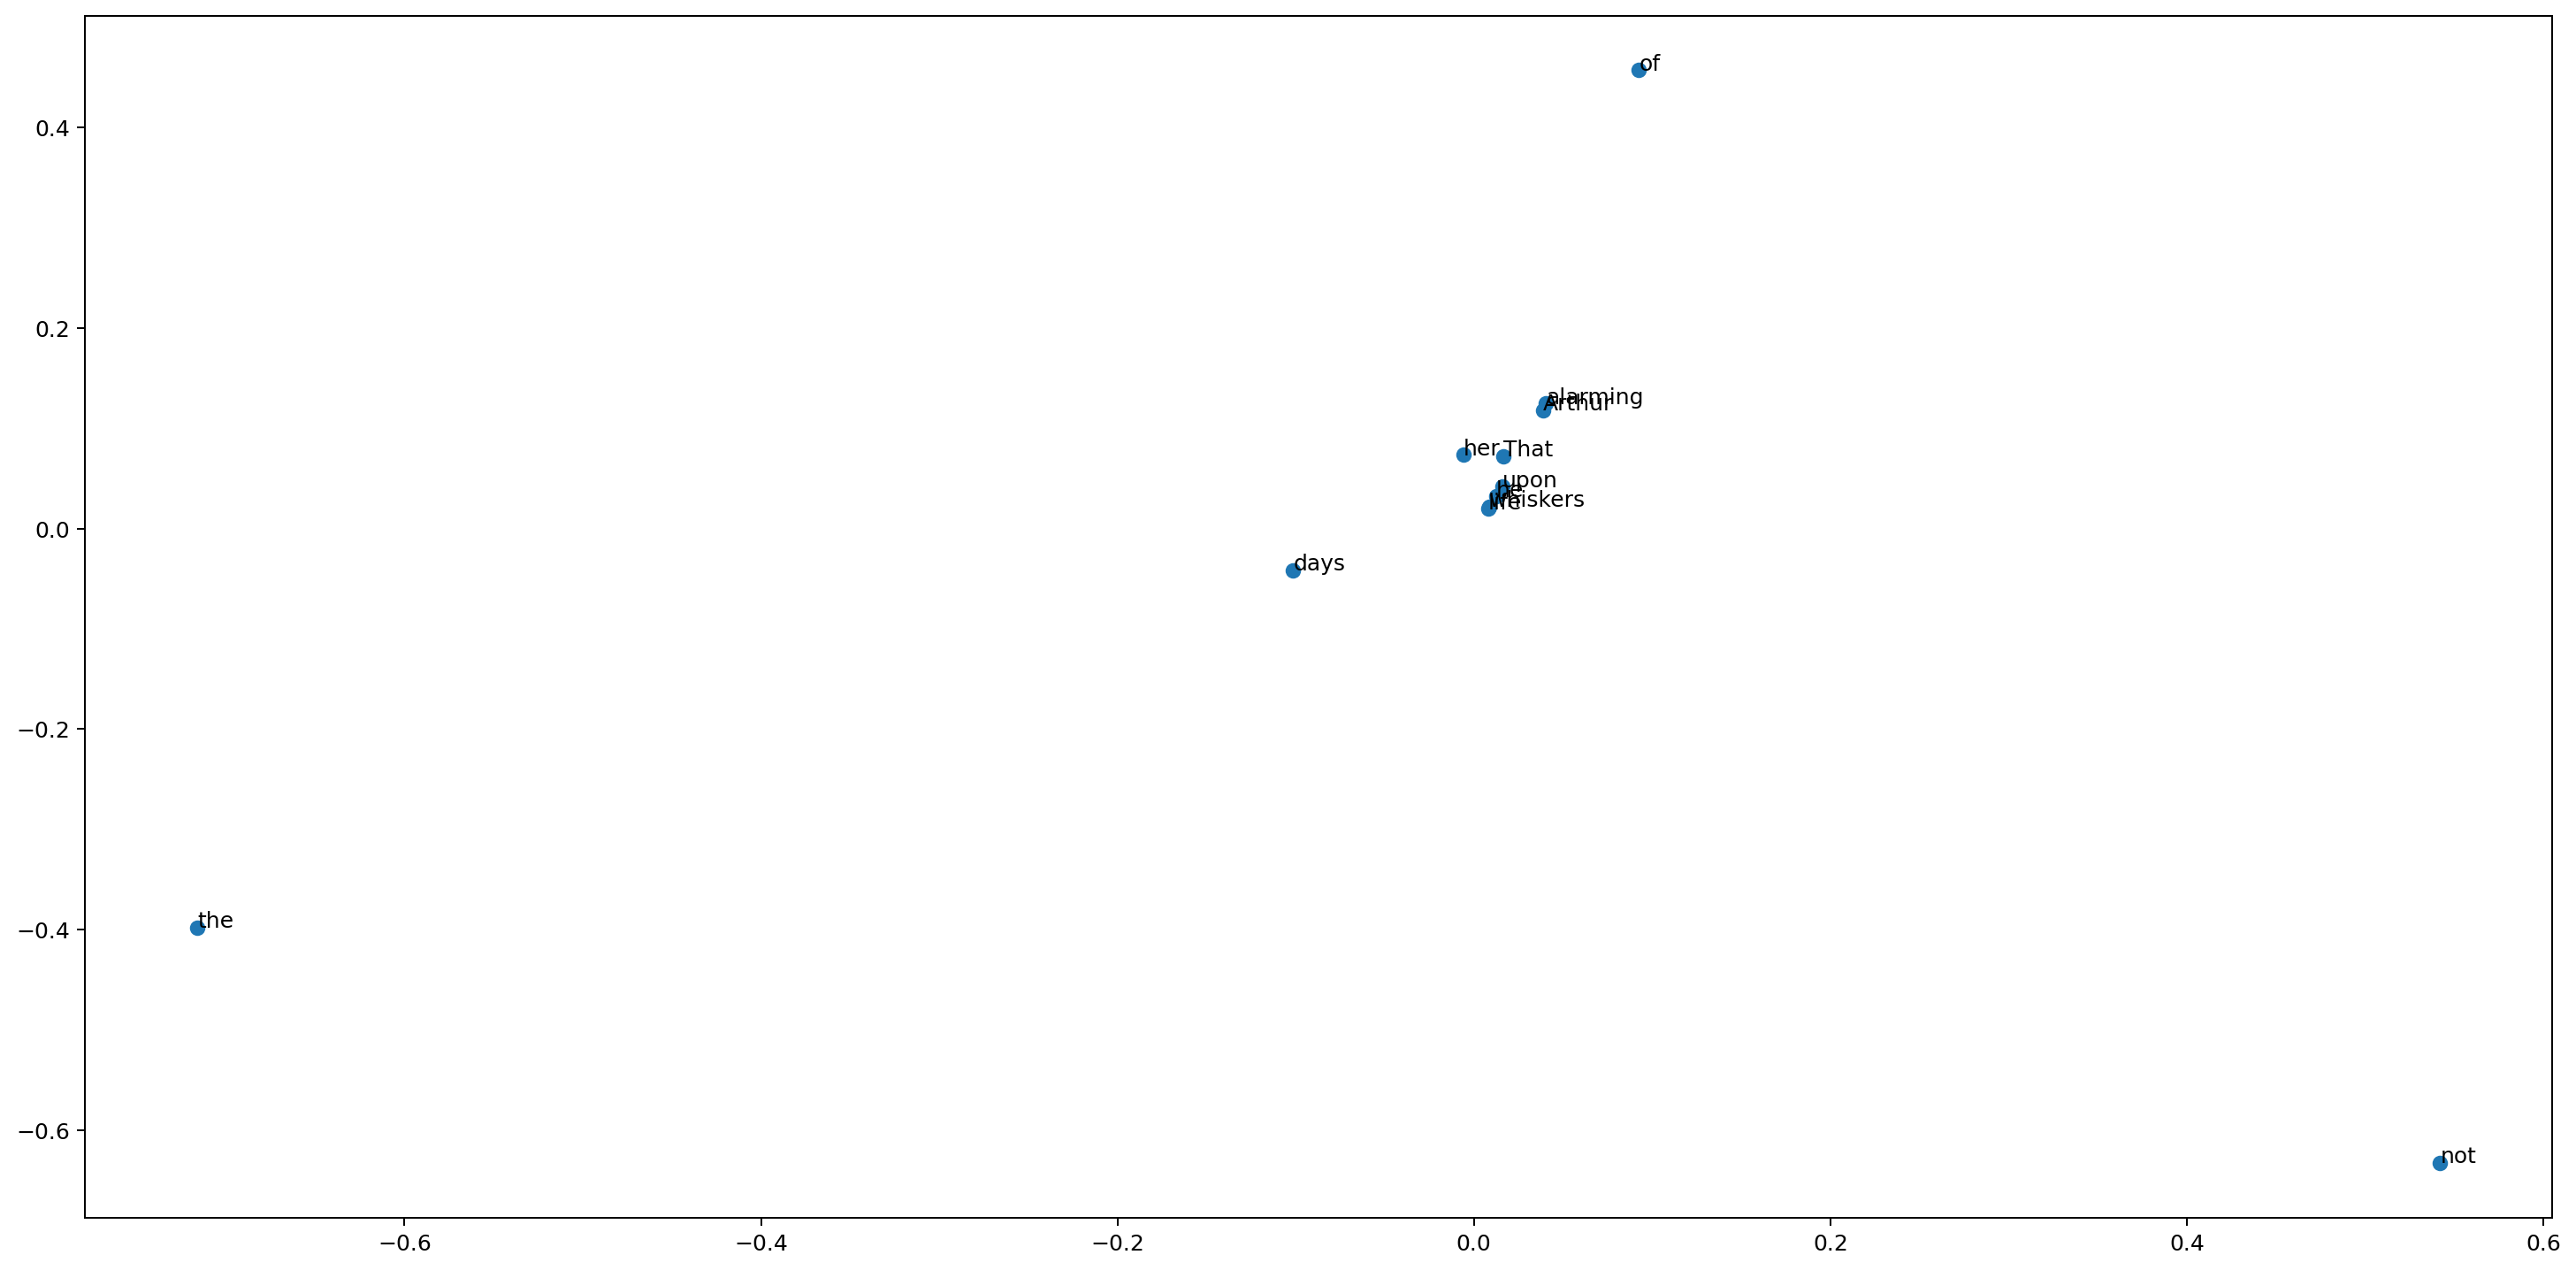

In [648]:
plt.figure(figsize=(20,10),dpi=180)
plt.scatter(x,y)
for i,txt in enumerate(list_word_visual):
    plt.annotate(txt,(x[i],y[i]))

In [650]:
#glove构建词向量